In [1]:
import numpy as np
import numpy.matlib as mat
import xarray as xr
import matplotlib.pyplot as plt
from My_functions import reverse_colourmap 

In [2]:
prefix = "_migration" #"_migration_without_thickness" #"_migration" #  
save_figs = 0

In [3]:
year_end = '2011'
files_home = "/data/rd_exchange/mbelharet/nemo_4.0_fabm_pisces"
filename_fabm = "C1D_PAPA_fabm" + prefix + "_1ts_20100615_" + year_end +"0614_diad_T.nc" 


In [4]:
data_fabm = xr.open_dataset(files_home + "/" + filename_fabm).isel(x=1, y=1)

In [5]:
##### depth of vertical levels ######
depth = data_fabm['deptht'].to_numpy()
##### time counter ##################
time_counter = data_fabm['time_counter'].to_numpy()

In [6]:
flags = ["_fabm"]

ndt_min = 0 #24*362
ndt_max = 24*2 #24*365


ncVars = ["local_random" ,"distributed","migrator_presence","par", "integral", "local", "local_loss", "mortality_switch", "term1", "term2",
          "par0", "integral_random_weights", "thickness","parmean","par","qsr","qsr_mean"]

In [7]:
id = -1
for flag in flags:
    id+=1
    for ncVar in ncVars:
        exec(ncVar + flag + "= data" + flag +"[\"" + ncVar + "\"].to_numpy()")

In [8]:
def plot_variables(variables, depth_level=0, x_lim = [], y_lim = [] ):
    fig = plt.figure(figsize=(10,6))
    nb = int(np.ceil(len(variables)/2))
    cptr = 0
    
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,2,cptr)
        for flag in flags:
            ldict = {}
            exec("v =" +  var + flag , globals(),ldict)
            v = ldict['v'] 
            
            if(v.ndim == 1):
                v_mean = v
            elif(v.ndim == 2):
                v_mean = v[:,depth_level]
            else:
                print("coucou")
               
            plt.plot(v_mean[ndt_min:ndt_max])
            
        
        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        plt.title(var , fontsize=12) 
        plt.ylabel("$µmol\ L^{-1}$",fontsize=8)
        plt.xlabel("Time (h)",fontsize=8)
        #plt.legend(["with FABM", "standard"])
        if(len(x_lim)==2):
            plt.xlim((x_lim[0],x_lim[1]))

        if(len(y_lim)==2):
            plt.ylim((y_lim[0],y_lim[1]))

    # Space between subplots
    fig.tight_layout(pad=1.5)

In [9]:
def plot_hovmoller(variables, depth_limits, time_limits):
    depth_min = depth_limits[0]
    depth_max = depth_limits[1]
    dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
    dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]

    ndt_min = time_limits[0]
    ndt_max = time_limits[1]
    

    fig = plt.figure(figsize=(10,6))
    my_cmap = reverse_colourmap(plt.cm.Spectral)
    
    nb = int(np.ceil(len(variables)/2))
    cptr = 0
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(2,2,cptr)
        ldict = {}
        exec("v_fabm =" +  var + "_fabm[" + str(ndt_min) + ":" + str(ndt_max) + "," + str(dep_min_id) + ":" + str(dep_max_id) + "]", globals(),ldict)
        v_fabm = ldict['v_fabm']

        v_anomaly = np.transpose(v_fabm)

        x = np.arange(0,v_anomaly.shape[1])*t_step
        [X,dep] = np.meshgrid(x,depth[dep_min_id:dep_max_id])
        
        pc = ax.pcolormesh(X,-dep,v_anomaly,cmap=my_cmap,shading="gouraud") #"shading = "gouraud" "nearest"
        clb=fig.colorbar(pc)
        #pc.set_clim(0,10)
        plt.title(var , fontsize=12)
        plt.xlabel("Time (h)")
        plt.ylabel("Depth (m)")

    # Space between subplots
    fig.tight_layout(pad=1.5)


In [10]:
def plot_vertical_profiles(variables , dep):

    
    fig = plt.figure(figsize=(10,8))
  
    nb = int(np.ceil(len(variables)/3))
    cptr = 0
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,3,cptr)
        
        for flag in flags:
            ldict = {}
            exec("v =" +  var + flag , globals(),ldict)
            v = ldict['v']
            if(v.ndim > 1):
                v_mean = np.mean(v,axis=0)
            else:
                v_mean = v
            
            plt.plot(v_mean,-dep)

        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        plt.title(var , fontsize=12) 
        plt.xlabel("$µmol\ L^{-1}$",fontsize=8)
        plt.ylabel("Depth (m)",fontsize=8)
        #plt.legend(["with FABM", "standard"])

    # Space between subplots
    fig.tight_layout(pad=1.5)


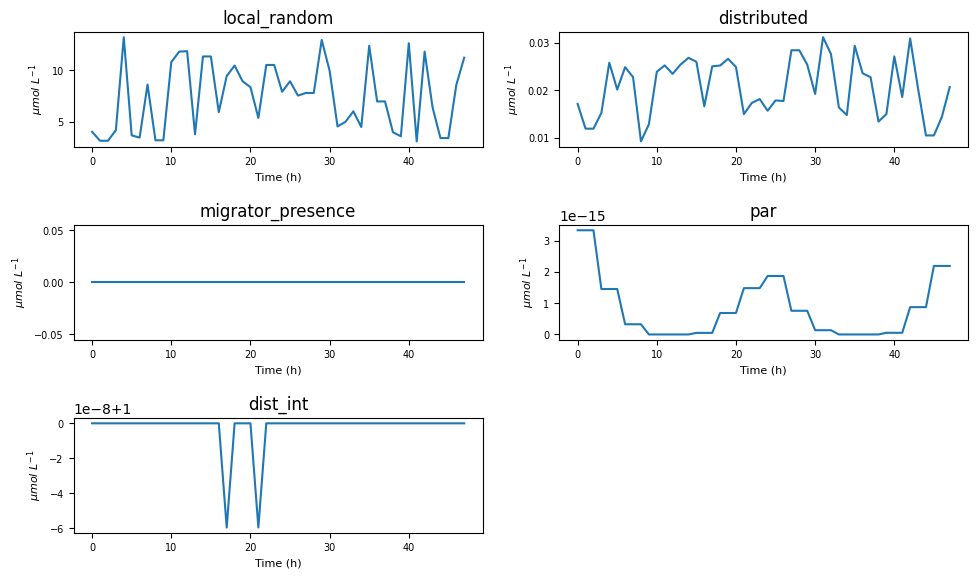

In [11]:
depth_level = 50
variables1 = ncVars[0:4]
dist_int_fabm = np.nansum(distributed_fabm, axis = 1)
variables1.append("dist_int")
plot_variables(variables1,depth_level)
if(save_figs):
    plt.savefig("comparison_BGC_variables_1" + prefix + ".png")

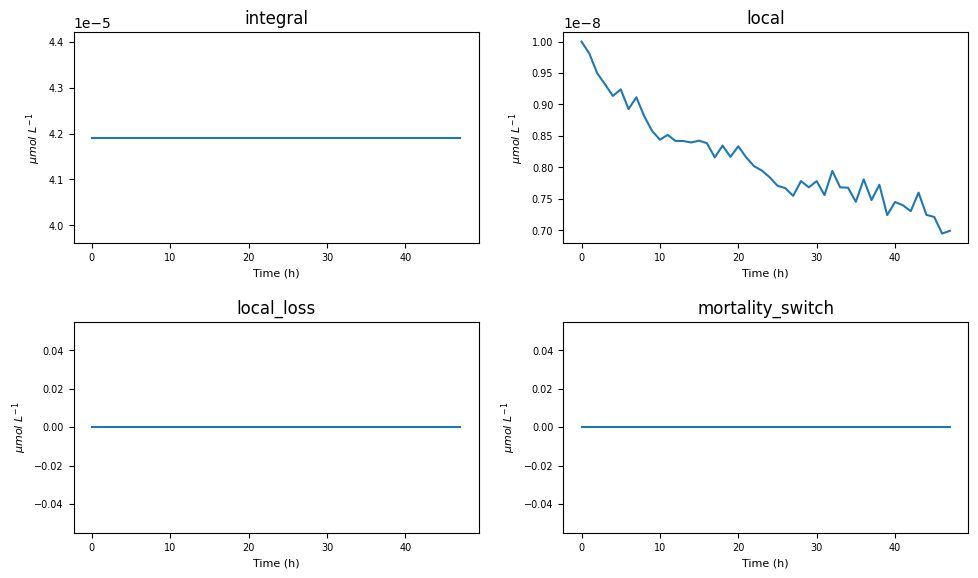

In [12]:
variables2 = ncVars[4:8]
plot_variables(variables2,depth_level)
if(save_figs):
    plt.savefig("comparison_BGC_variables_2" + prefix + ".png")


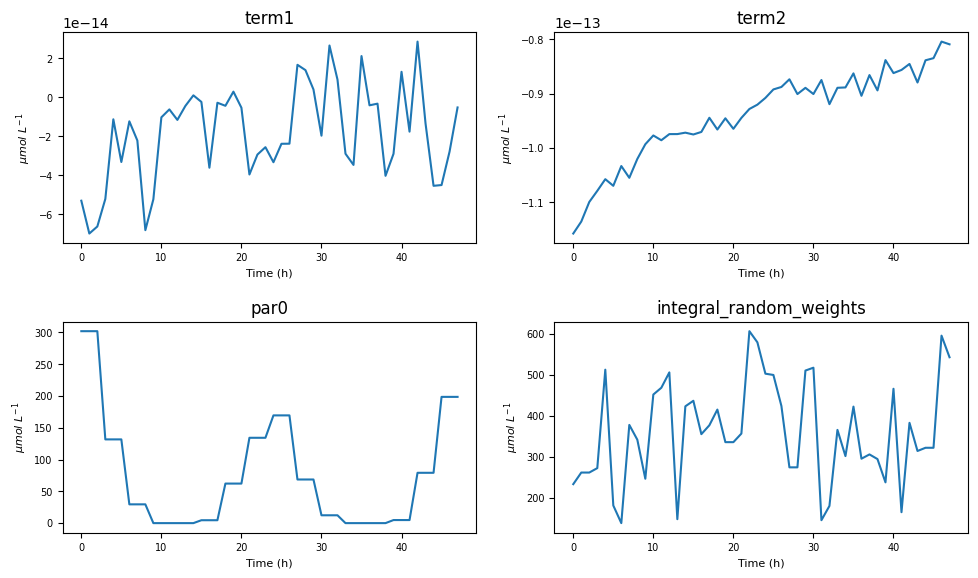

In [13]:
variables3 = ncVars[8:12]
plot_variables(variables3,depth_level)
if(save_figs):
    plt.savefig("comparison_BGC_variables_" + prefix + ".png")

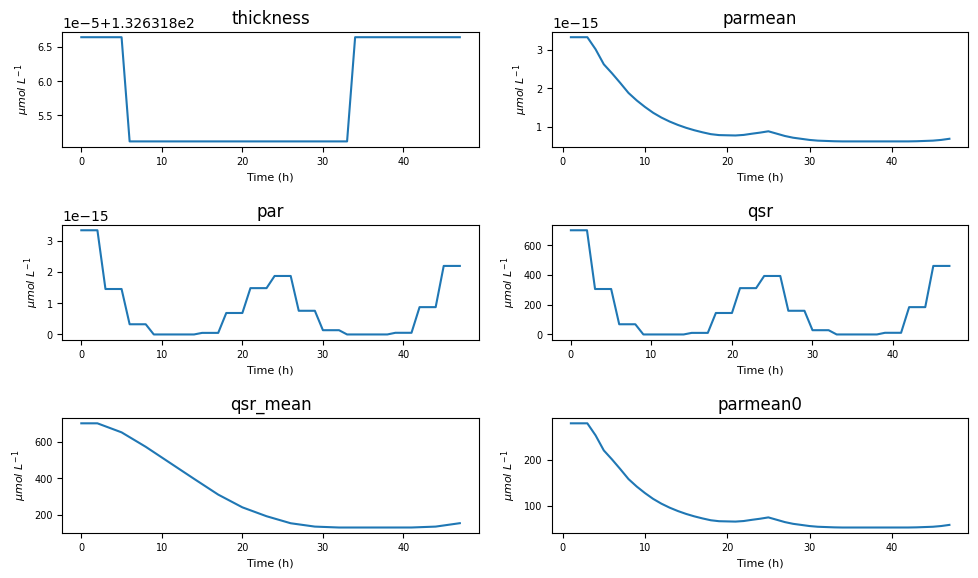

In [14]:
variables3_ = ncVars[12:]
parmean0_fabm = parmean_fabm[:,0]
variables3_.append("parmean0")
plot_variables(variables3_,depth_level)
if(save_figs):
    plt.savefig("comparison_BGC_variables_" + prefix + ".png")

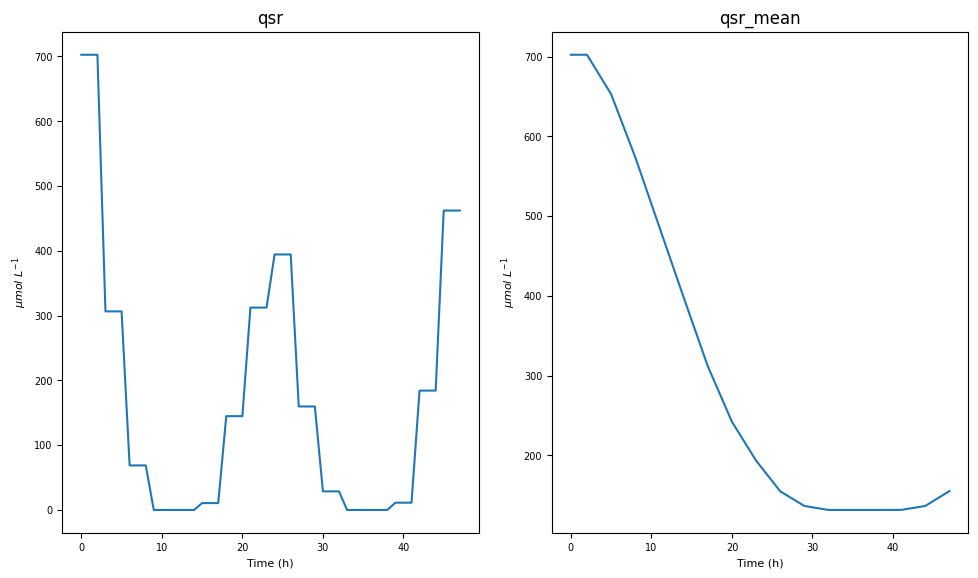

In [15]:

plot_variables(["qsr","qsr_mean"],depth_level)

In [16]:
#variables5 = ncVars[-1:]
#plot_hovmoller(variables5, depth_limits, time_limits)

In [17]:
'''
sum_distributed_fabm = np.nansum(distributed_fabm, axis=1)
idx = np.where(sum_distributed_fabm > 1.5)
print(idx)

plot_variables(['sum_distributed'],depth_level)
'''



"\nsum_distributed_fabm = np.nansum(distributed_fabm, axis=1)\nidx = np.where(sum_distributed_fabm > 1.5)\nprint(idx)\n\nplot_variables(['sum_distributed'],depth_level)\n"

In [18]:
######################################################################################################################

In [19]:

filename_fabm = "C1D_PAPA_fabm" + prefix + "_1ts_20100615_" + year_end + "0614_ptrc_T.nc" 

data_fabm_ = xr.open_dataset(files_home + "/" + filename_fabm).isel(x=1, y=1)

ncVars_ = ["mesozoo"]

id = -1
for flag in flags:
    id+=1
    for ncVar in ncVars_:
        exec(ncVar + flag + "= data" + flag +"_[\"" + ncVar + "\"].to_numpy()")


In [20]:
toto = mat.repmat(integral_fabm, 75,1)
toto = np.transpose(toto)

recon_meso_fabm = (distributed_fabm  * toto * 1e6)/thickness_fabm

print(mesozoo_fabm.shape)
print(thickness_fabm.shape)
print(thickness_fabm[0:5,0])
print(thickness_fabm[0,0:5])

zoo_d = np.transpose(mesozoo_fabm * 1e-6 * thickness_fabm)
recon_integral_fabm = np.nansum(zoo_d , axis = 0)

#print(zoo_d.shape)
#print(recon_integral_fabm.shape)

A = np.transpose(mesozoo_fabm)
B = A /np.nansum(A,axis=0)

#print(A.shape)
#print(B.shape)



#print(zoo_t.shape)

zoo_n = B  
zoo_n_fabm = np.transpose(B)
#print(zoo_n.shape)

DEP = np.transpose(mat.repmat(depth,zoo_n.shape[1],1))

DEP_fabm = np.transpose(DEP)
#print(DEP[0:5,0:5])
#toto = np.nansum(zoo_n, axis=0)
#print(toto[0:5])

#print(DEP.shape)
#print(zoo_n.shape)

WMD_fabm = np.nansum(zoo_n * DEP, axis=0)
#print(WMD_fabm.shape)

'''
zoo_max = mesozoo_fabm.max(1)

k = zoo_max.shape[0] 

depth_max = np.zeros(k-1)

for i in range(0,k):
    v = mesozoo_fabm[i,:]
    id = np.where(v == zoo_max[i])
    print(id)
    depth_max[i] = depth[id]
'''



(8760, 75)
(8760, 75)
[1.0239066 1.0239066 1.0239066 1.0239066 1.0239066]
[1.0239066 1.0792834 1.1481192 1.2337433 1.340185 ]


'\nzoo_max = mesozoo_fabm.max(1)\n\nk = zoo_max.shape[0] \n\ndepth_max = np.zeros(k-1)\n\nfor i in range(0,k):\n    v = mesozoo_fabm[i,:]\n    id = np.where(v == zoo_max[i])\n    print(id)\n    depth_max[i] = depth[id]\n'

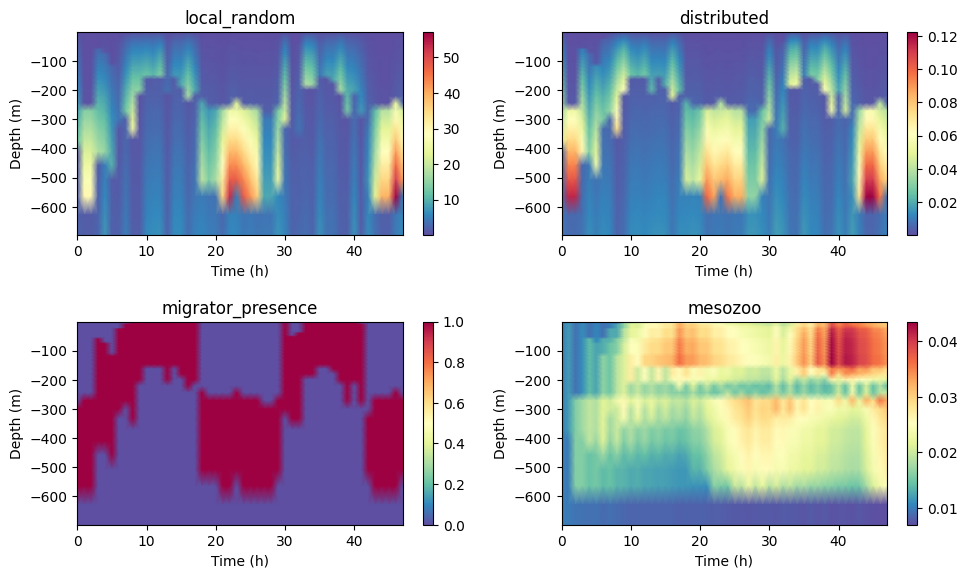

In [21]:
t_step = 1
variables4 = ncVars[0:3]
depth_limits = np.array([0, 800])
time_limits = np.array([ndt_min, ndt_max])

variables4.append("mesozoo")


plot_hovmoller(variables4, depth_limits, time_limits)

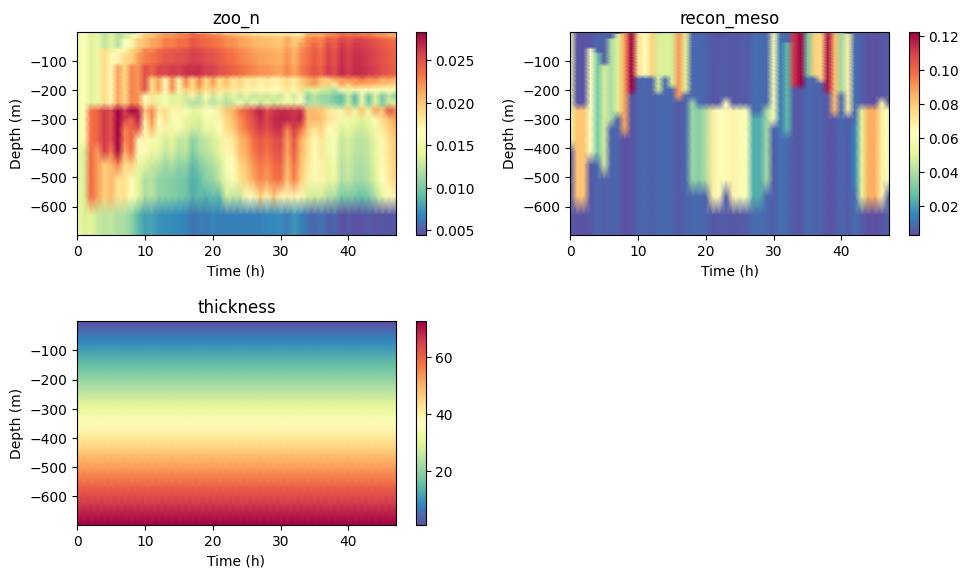

In [22]:

plot_hovmoller(['zoo_n','recon_meso','thickness'], depth_limits, time_limits)


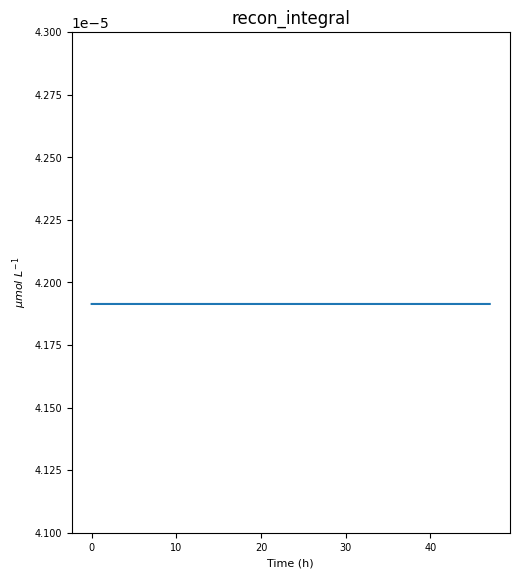

In [23]:
#var_fabm = (local_fabm[1:] - local_fabm[0:-1])*3600*24
#plot_variables(['var'],depth_level)
plot_variables(['recon_integral'],depth_level,[],[4.1e-5, 4.3e-5])
#var_fabm = mesozoo_fabm[40,:]
#print(var_fabm)
#plot_variables(['var'],depth_level)

In [24]:
###########################################################################################################################################
# WEIGHTED MEAN DEPTH
###########################################################################################################################################

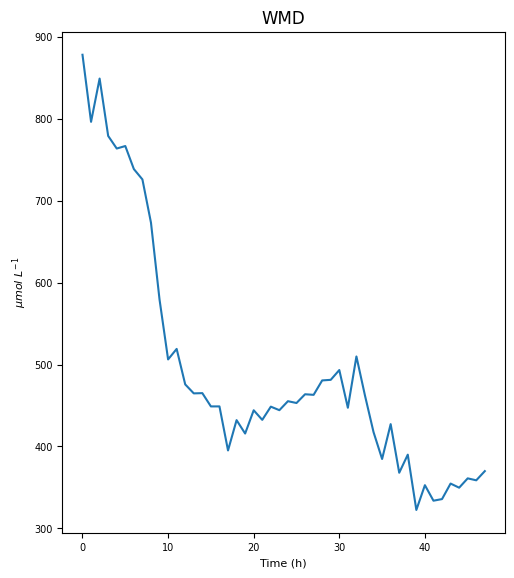

In [25]:
plot_variables(['WMD'],depth_level)

69.185814


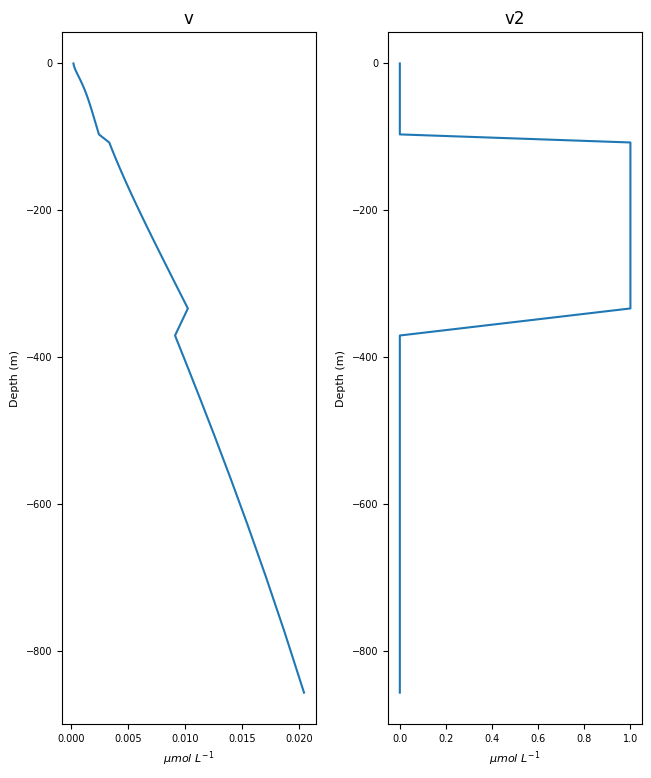

In [26]:
depth_min = 0
depth_max = 1000
dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]
v_fabm = distributed_fabm[24*364, dep_min_id:dep_max_id]
v2_fabm = migrator_presence_fabm[24*364, dep_min_id:dep_max_id]
variables = ["v","v2"]
plot_vertical_profiles(variables, depth[dep_min_id:dep_max_id])

print(parmean_fabm[24*364, 0])

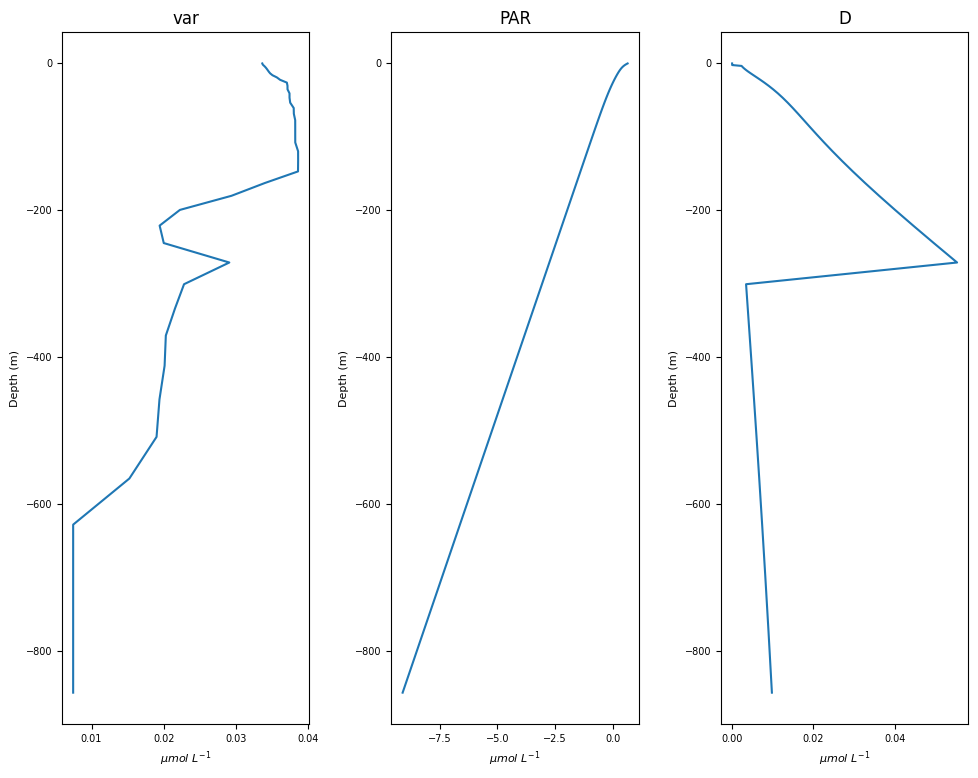

In [27]:
var_fabm = mesozoo_fabm[40,dep_min_id:dep_max_id]
PAR_fabm = np.log10(par_fabm[40,dep_min_id:dep_max_id])
D_fabm = distributed_fabm[39,dep_min_id:dep_max_id]
plot_vertical_profiles(['var','PAR','D'], depth[dep_min_id:dep_max_id])



2.6526373291015624
2.9282659912109374
3.281132507324219
3.6916238403320314


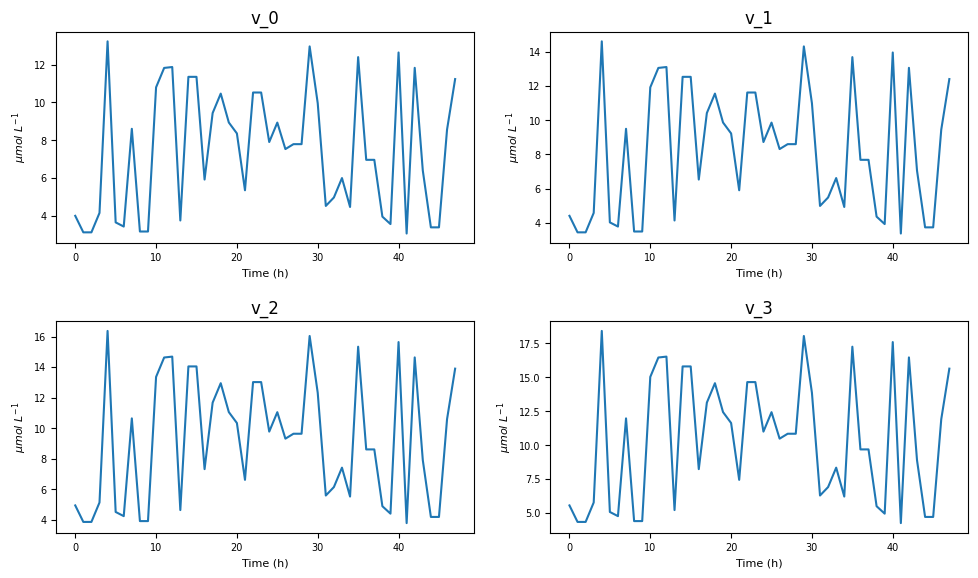

In [28]:
niv = np.array([50, 52, 55, 60])
for i in range(0,niv.size):
    exec("v_" + str(i) + "_fabm = local_random_fabm[:," + str(niv[i]) + "]")
    print(0.02 * thickness_fabm[0,niv[i]])
    
plot_variables(["v_0", "v_1", "v_2","v_3"],0)    


In [29]:
id = np.where(par_fabm<0)
print(id[1])
print(par_fabm[8750,12])
print(par_fabm[60,1])
print(par_fabm[61,2])

[]
0.0
0.0
0.0


In [30]:
distributed = distributed_fabm
meso_conc_prev = 1.e-2 * np.ones(distributed.shape[1]) # mmol m-3
#print(meso_conc_prev.shape)
     
run_time = distributed.shape[0]

meso_conc = np.empty(distributed.shape)
meso_conc[0,:] = meso_conc_prev
toto = np.empty(distributed.shape)
meso_int = np.empty(distributed.shape)


for t in range(1,run_time):
    th = thickness_fabm[0,:]
    d = distributed[t,:]
    meso_conc_int = np.nansum(meso_conc_prev * th) #mmol m-2
          
    dc = -meso_conc_prev + (d * meso_conc_int/th) # mmol m-3
    
    
    toto[t-1,:] = (d * meso_conc_int) #/th
    meso_conc_prev = meso_conc_prev + dc
    meso_conc[t,:] = meso_conc_prev   
    
    
    meso_int[t-1] = meso_conc_int
    #meso_conc = np.concatenate((meso_conc,meso_conc_prev), axis = 1)

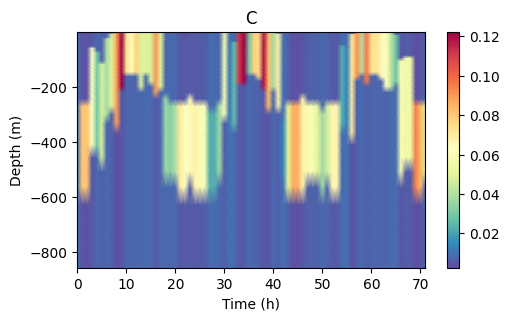

In [33]:
C_fabm = meso_conc
plot_hovmoller(["C"], [0, 1000], [0,24*3] )